<a href="https://colab.research.google.com/github/anky19698/Cricket_Analytics/blob/main/Cricket_Score_Predictor_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data From Cricsheet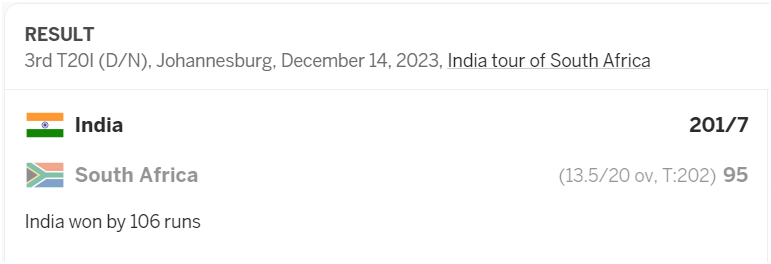

In [ ]:
# Get the T20 Ball by Ball Data

import requests
import zipfile
import io
import os
import pandas as pd
import glob
import os
import numpy as np

url = 'https://cricsheet.org/downloads/t20s_male_csv2.zip'

response = requests.get(url)
destination_folder = 't20_male_csv'

if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
        zip_ref.extractall(destination_folder)
        print('success')
else:
    print('failed')


In [4]:
files = glob.glob('/content/t20_male_csv/[0-9]*.csv')
all_files = []
for file in files:
  filename = os.path.basename(file)
  # print(filename[:-4])
  if 'info' not in filename:
    # print(filename)
    all_files.append(file)

df = pd.concat((pd.read_csv(f, header = 0) for f in all_files))

# exporting final csv without super overs data

df = df[df['innings'] < 3]

df.to_csv('t20_ball_by_ball.csv', index=False)

# Feature Engineering

In [95]:
data = pd.read_csv('/content/t20_ball_by_ball.csv')

<ipython-input-95-938557ebda9d>:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/t20_ball_by_ball.csv')


In [96]:
# Sort Values

data = data.sort_values(['match_id', 'innings'], ascending=[True, True])

data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
317787,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317788,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317789,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317790,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317791,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [98]:
# Filter By Consistent Teams

teams = ['England', 'India', 'Australia', 'Pakistan', 'South Africa', 'New Zealand', 'Bangladesh', 'West Indies', 'Sri Lanka']

data = data[(data['batting_team'].isin(teams)) & (data['bowling_team'].isin(teams))].reset_index(drop=True)

data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,211028,2005,2005-06-13,The Rose Bowl,1,0.1,England,Australia,ME Trescothick,GO Jones,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,211028,2005,2005-06-13,The Rose Bowl,1,0.2,England,Australia,ME Trescothick,GO Jones,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,211028,2005,2005-06-13,The Rose Bowl,1,0.3,England,Australia,GO Jones,ME Trescothick,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,211028,2005,2005-06-13,The Rose Bowl,1,0.4,England,Australia,GO Jones,ME Trescothick,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,211028,2005,2005-06-13,The Rose Bowl,1,0.5,England,Australia,GO Jones,ME Trescothick,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
# Split the Ball to Ball number and Over Number

data['ball'] = data['ball'].astype('str')
data['overs'] = data['ball'].str[:]
data['over'] = data['ball'].str[:1]
data['ball'] = data['ball'].str[-1:]


data.head()


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,overs,over
0,211028,2005,2005-06-13,The Rose Bowl,1,1,England,Australia,ME Trescothick,GO Jones,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0
1,211028,2005,2005-06-13,The Rose Bowl,1,2,England,Australia,ME Trescothick,GO Jones,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,0
2,211028,2005,2005-06-13,The Rose Bowl,1,3,England,Australia,GO Jones,ME Trescothick,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,0
3,211028,2005,2005-06-13,The Rose Bowl,1,4,England,Australia,GO Jones,ME Trescothick,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,0
4,211028,2005,2005-06-13,The Rose Bowl,1,5,England,Australia,GO Jones,ME Trescothick,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0


In [100]:
data = data.replace(np.nan, 0)

In [101]:
# Total Runs

data['total_runs'] = data['runs_off_bat'] + data['extras']

# Total Runs per innings

data['total'] = data.groupby(['match_id', 'innings'])['total_runs'].transform('sum')

# Runs Scored till current ball

data['cum_runs'] = data.groupby(['match_id', 'innings'])['total_runs'].apply(lambda x: x.cumsum())

# Players Dismissed

data['player_dismissed'] = np.where(data['player_dismissed'] == 0, 0, 1)

In [102]:
# Selecting Only Required Columns

# data.columns
req_columns = ['match_id', 'season', 'venue', 'innings', 'overs',
       'batting_team', 'bowling_team', 'player_dismissed','ball', 'over', 'total_runs', 'total',
       'cum_runs']

score_data = data[req_columns]

In [103]:
# Runs in Last 30 Balls

tmp = score_data.groupby(['match_id', 'innings'])['total_runs'].rolling(min_periods=1, window=30).sum().reset_index()

score_data['prev_30_runs'] = tmp['total_runs'].to_list()

<ipython-input-103-d55e9768bbb5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_data['prev_30_runs'] = tmp['total_runs'].to_list()


In [104]:
# wickets in Last 30 Balls

tmp = score_data.groupby(['match_id', 'innings'])['player_dismissed'].rolling(min_periods=1, window=30).sum().reset_index()

score_data['prev_30_wkts'] = tmp['player_dismissed'].to_list()

<ipython-input-104-6c203af70354>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_data['prev_30_wkts'] = tmp['player_dismissed'].to_list()


In [105]:
# Wickets Till Current Ball

score_data['cum_wkts'] = score_data.groupby(['match_id', 'innings'])['player_dismissed'].apply(lambda x: x.cumsum())

<ipython-input-105-e98172de3455>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_data['cum_wkts'] = score_data.groupby(['match_id', 'innings'])['player_dismissed'].apply(lambda x: x.cumsum())


In [106]:
# Dots in Previous 30 Balls

score_data['prev_30_dots'] = np.where(score_data['total_runs'] == 0, 1, 0)

tmp = score_data.groupby(['match_id', 'innings'])['prev_30_dots'].rolling(min_periods=1, window=30).sum().reset_index()

score_data['prev_30_dots'] = tmp['prev_30_dots'].to_list()

<ipython-input-106-84777c97ce60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_data['prev_30_dots'] = np.where(score_data['total_runs'] == 0, 1, 0)
<ipython-input-106-84777c97ce60>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_data['prev_30_dots'] = tmp['prev_30_dots'].to_list()


In [107]:
# Boundaries in Previous 30 Balls

score_data['prev_30_boundary'] = np.where(score_data['total_runs'] > 3, 1, 0)

tmp = score_data.groupby(['match_id', 'innings'])['prev_30_boundary'].rolling(min_periods=1, window=30).sum().reset_index()

score_data['prev_30_boundary'] = tmp['prev_30_boundary'].to_list()

<ipython-input-107-69d3039aaab4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_data['prev_30_boundary'] = np.where(score_data['total_runs'] > 3, 1, 0)
<ipython-input-107-69d3039aaab4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_data['prev_30_boundary'] = tmp['prev_30_boundary'].to_list()


## Additional Features : Venue

In [108]:
# Venue

# For Venue We Will Create a Dictionary

venues = score_data.venue.unique()

venues.sort()

venue_dict = {}

for i, j in enumerate(venues):
    venue_dict[j] = i

venue_dict

{'AMI Stadium': 0,
 'Adelaide Oval': 1,
 'Arnos Vale Ground, Kingstown': 2,
 'Arun Jaitley Stadium': 3,
 'Arun Jaitley Stadium, Delhi': 4,
 'Barabati Stadium': 5,
 'Barabati Stadium, Cuttack': 6,
 'Barsapara Cricket Stadium': 7,
 'Barsapara Cricket Stadium, Guwahati': 8,
 'Bay Oval': 9,
 'Bay Oval, Mount Maunganui': 10,
 'Beausejour Stadium, Gros Islet': 11,
 'Bellerive Oval': 12,
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium': 13,
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow': 14,
 'Boland Park': 15,
 'Brabourne Stadium': 16,
 'Brian Lara Stadium, Tarouba, Trinidad': 17,
 'Brisbane Cricket Ground, Woolloongabba': 18,
 'Brisbane Cricket Ground, Woolloongabba, Brisbane': 19,
 'Buffalo Park': 20,
 'Carrara Oval': 21,
 'Central Broward Regional Park Stadium Turf Ground': 22,
 'Central Broward Regional Park Stadium Turf Ground, Lauderhill': 23,
 'Coolidge Cricket Ground, Antigua': 24,
 'County Ground': 25,
 'County Ground, Bristol': 26,
 'Daren S

In [109]:
score_data=score_data.replace({'venue':venue_dict})

score_data.head()

,match_id,season,venue,innings,overs,batting_team,bowling_team,player_dismissed,ball,over,total_runs,total,cum_runs,prev_30_runs,prev_30_wkts,cum_wkts,prev_30_dots,prev_30_boundary
0,211028,2005,131,1,0.1,England,Australia,0,1,0,0,179,0,0.0,0.0,0,1.0,0.0
1,211028,2005,131,1,0.2,England,Australia,0,2,0,1,179,1,1.0,0.0,0,1.0,0.0
2,211028,2005,131,1,0.3,England,Australia,0,3,0,0,179,1,1.0,0.0,0,2.0,0.0
3,211028,2005,131,1,0.4,England,Australia,0,4,0,0,179,1,1.0,0.0,0,3.0,0.0
4,211028,2005,131,1,0.5,England,Australia,0,5,0,0,179,1,1.0,0.0,0,4.0,0.0


In [110]:
# Batting and Bowling Team

teams = score_data.batting_team.unique()

teams.sort()

teams_dict = {}

for i, j in enumerate(teams):
    teams_dict[j] = i+1

# teams_dict

score_data=score_data.replace({'batting_team':teams_dict})

score_data=score_data.replace({'bowling_team':teams_dict})

score_data.head()

,match_id,season,venue,innings,overs,batting_team,bowling_team,player_dismissed,ball,over,total_runs,total,cum_runs,prev_30_runs,prev_30_wkts,cum_wkts,prev_30_dots,prev_30_boundary
0,211028,2005,131,1,0.1,3,1,0,1,0,0,179,0,0.0,0.0,0,1.0,0.0
1,211028,2005,131,1,0.2,3,1,0,2,0,1,179,1,1.0,0.0,0,1.0,0.0
2,211028,2005,131,1,0.3,3,1,0,3,0,0,179,1,1.0,0.0,0,2.0,0.0
3,211028,2005,131,1,0.4,3,1,0,4,0,0,179,1,1.0,0.0,0,3.0,0.0
4,211028,2005,131,1,0.5,3,1,0,5,0,0,179,1,1.0,0.0,0,4.0,0.0


In [111]:
# Season

score_data.season.unique()

array(['2005', '2004/05', '2005/06', '2006', '2006/07', '2007', '2007/08',
       '2008', '2009', '2008/09', '2009/10', '2010', '2010/11', '2011',
       '2011/12', '2012/13', '2012', '2013', '2013/14', '2014', '2014/15',
       '2015', '2015/16', '2016', '2016/17', '2017', '2017/18', '2018',
       '2018/19', '2019', '2019/20', '2020', '2020/21', '2021', '2021/22',
       '2022', '2022/23', '2023', '2023/24'], dtype=object)

# Machine Learning

In [73]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [74]:
score_data = score_data[['match_id', 'venue', 'innings', 'overs', 'batting_team',
       'bowling_team','cum_runs', 'prev_30_runs', 'cum_wkts', 'prev_30_dots',
       'prev_30_boundary','prev_30_wkts', 'total']]

In [75]:
# Dropping Unnecessary Columns

x = score_data.drop(['match_id', 'total'], axis=1)

y = score_data['total'].values

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

x_train = x_train.values
x_test = x_test.values
x_train = np.asarray(x_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)

In [77]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((127785, 11), (42596, 11), (127785,), (42596,))

## Linear Regression

In [78]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [79]:
filename = 'lr.pkl'
pickle.dump(model, open(filename, 'wb'))

In [80]:
prediction = model.predict(x_test)
mean_absolute_error(y_test, prediction)

20.20848533905485

In [117]:
# Function to predict scores by linear regression model:

def score_prediction_LR(venue, innings, overs, batting_team,
       bowling_team, cum_runs, prev_30_runs, cum_wkts, prev_30_dots,
       prev_30_boundary, prev_30_wkts):
  venue = venue_dict[venue]
  batting_team = teams_dict[batting_team]
  bowling_team = teams_dict[bowling_team]

  temp_array = [venue, innings, overs, batting_team,
       bowling_team, cum_runs, prev_30_runs, cum_wkts, prev_30_dots,
       prev_30_boundary, prev_30_wkts]

  prediction = model.predict(np.array([temp_array]))


  print('Predicted score by Linear regressor: ',prediction)
  print('Predicted score range: ',prediction -20, 'to' , prediction + 20)







## Random Forest

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
RFR=RandomForestRegressor(n_estimators=100)

In [114]:
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [114]:
RFR.score(x_train,y_train)

In [116]:
prediction=RFR.predict(x_test)
mean_absolute_error (y_test, prediction)

4.753339049925695

In [120]:
# Function to predict scores by random forest model:

def score_prediction_RF(venue, innings, overs, batting_team,
       bowling_team, cum_runs, prev_30_runs, cum_wkts, prev_30_dots,
       prev_30_boundary, prev_30_wkts):
  venue = venue_dict[venue]
  batting_team = teams_dict[batting_team]
  bowling_team = teams_dict[bowling_team]

  temp_array = [venue, innings, overs, batting_team,
       bowling_team, cum_runs, prev_30_runs, cum_wkts, prev_30_dots,
       prev_30_boundary, prev_30_wkts]

  prediction = RFR.predict(np.array([temp_array]))


  print('Predicted score by Random Forest: ',prediction)
  print('Predicted score range: ',prediction -5, 'to' , prediction + 5)

# Score Prediction: Ind vs SA 3rd T20I 14th Dec 2023

In [121]:
# Ind vs SA 3rd T20I 14th Dec 2023

batting_team = 'India'

bowling_team = 'South Africa'

venue='The Wanderers Stadium, Johannesburg'

overs = 12.6

innings=1

total_score = 131 # current score

total_wickets = 2 # current wicket

prev_runs_30 = 56 # runs in last 30 balls

prev_wickets_30 = 0 # wickets in last 30 balls

prev_30_dot_balls = 7 # dots in last 30 balls

prev_30_boundaries = 7 # boundaries in last 30 balls

score_prediction_LR(venue, innings, overs, batting_team,
       bowling_team, total_score, prev_runs_30, total_wickets, prev_30_dot_balls,
       prev_30_boundaries, prev_wickets_30)

score_prediction_RF(venue, innings, overs, batting_team,
       bowling_team, total_score, prev_runs_30, total_wickets, prev_30_dot_balls,
       prev_30_boundaries, prev_wickets_30)

Predicted score by Linear regressor:  [189.85400162]
Predicted score range:  [169.85400162] to [209.85400162]
Predicted score by Random Forest:  [200.98]
Predicted score range:  [195.98] to [205.98]


# Actual Score: IND: 201/7

https://www.espncricinfo.com/series/india-in-south-africa-2023-24-1387592/south-africa-vs-india-3rd-t20i-1387599/ball-by-ball-commentary